# Training with Trainer and TrainConfig

In [2]:
import random
from itertools import count

import numpy as np
import torch
from matplotlib import pyplot as plt
from matplotlib.figure import Figure
from torch.nn import Module
from torch.utils.data import DataLoader

from qadence import hea, QuantumCircuit, Z
from qadence.constructors import feature_map, hamiltonian_factory
from qadence.ml_tools import Trainer, TrainConfig
from qadence.ml_tools.data import to_dataloader
from qadence.ml_tools.utils import rand_featureparameters
from qadence.ml_tools.models import QNN, QuantumModel
from qadence.types import ExperimentTrackingTool

hyperparams = {
    "seed": 42,
    "batch_size": 10,
    "n_qubits": 2,
    "ansatz_depth": 1,
    "observable": Z,
}

np.random.seed(hyperparams["seed"])
torch.manual_seed(hyperparams["seed"])
random.seed(hyperparams["seed"])


def dataloader(batch_size: int = 25) -> DataLoader:
    x = torch.linspace(0, 1, batch_size).reshape(-1, 1)
    y = torch.cos(x)
    return to_dataloader(x, y, batch_size=batch_size, infinite=True)

In [3]:
obs = hamiltonian_factory(register=hyperparams["n_qubits"], detuning=hyperparams["observable"])

data = dataloader(hyperparams["batch_size"])
fm = feature_map(hyperparams["n_qubits"], param="x")

model = QNN(
    QuantumCircuit(
        hyperparams["n_qubits"], fm, hea(hyperparams["n_qubits"], hyperparams["ansatz_depth"])
    ),
    observable=obs,
    inputs=["x"],
)

cnt = count()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

inputs = rand_featureparameters(model, 1)

def loss_fn(model: QuantumModel, data: torch.Tensor) -> tuple[torch.Tensor, dict]:
    next(cnt)
    out = model.expectation(inputs)
    loss = criterion(out, torch.rand(1))
    return loss, {}

In [4]:
def plot_fn(model: Module, iteration: int) -> tuple[str, Figure]:
    descr = f"ufa_prediction_epoch_{iteration}.png"
    fig, ax = plt.subplots()
    x = torch.linspace(0, 1, 100).reshape(-1, 1)
    out = model.expectation(x)
    ax.plot(x.detach().numpy(), out.detach().numpy())
    return descr, fig


config = TrainConfig(
    root_folder="mlflow_demonstration",
    max_iter=10,
    checkpoint_every=1,
    plot_every=2,
    write_every=1,
    log_model=True,
    tracking_tool=ExperimentTrackingTool.MLFLOW,
    hyperparams=hyperparams,
    plotting_functions=(plot_fn,),
)

2025-02-15 14:53:58 WARNING  Both `log_folder` and `root_folder` provided by the user.        ]8;id=234053;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/train_utils/config_manager.py\config_manager.py]8;;\:]8;id=146316;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/train_utils/config_manager.py#179\179]8;;\

/home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/torch/nn/modules/loss.py:538: UserWarning: 
Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely 
lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)

/home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/networkx/readwrite/json_graph/node_link.py:1
42: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(

                    INFO     Writing QNN checkpoint model_QNN_ckpt_001_device_cpu.pt                ]8;id=844962;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=167414;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#106\106]8;;\

                    INFO     Writing Adam to checkpoint opt_Adam_ckpt_001_device_cpu.pt             ]8;id=225772;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=800581;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#116\116]8;;\

                    INFO     Writing QNN checkpoint model_QNN_ckpt_002_device_cpu.pt                ]8;id=562275;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=130889;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#106\106]8;;\

                    INFO     Writing Adam to checkpoint opt_Adam_ckpt_002_device_cpu.pt             ]8;id=307419;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=869693;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#116\116]8;;\

2025-02-15 14:53:59 INFO     Writing QNN checkpoint model_QNN_ckpt_003_device_cpu.pt                ]8;id=398591;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=291476;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#106\106]8;;\

                    INFO     Writing Adam to checkpoint opt_Adam_ckpt_003_device_cpu.pt             ]8;id=170555;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=388162;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#116\116]8;;\

                    INFO     Writing QNN checkpoint model_QNN_ckpt_004_device_cpu.pt                ]8;id=970342;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=671088;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#106\106]8;;\

                    INFO     Writing Adam to checkpoint opt_Adam_ckpt_004_device_cpu.pt             ]8;id=340035;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=883794;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#116\116]8;;\

                    INFO     Writing QNN checkpoint model_QNN_ckpt_005_device_cpu.pt                ]8;id=752787;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=329963;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#106\106]8;;\

                    INFO     Writing Adam to checkpoint opt_Adam_ckpt_005_device_cpu.pt             ]8;id=927657;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=958972;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#116\116]8;;\

                    INFO     Writing QNN checkpoint model_QNN_ckpt_006_device_cpu.pt                ]8;id=229974;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=145051;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#106\106]8;;\

                    INFO     Writing Adam to checkpoint opt_Adam_ckpt_006_device_cpu.pt             ]8;id=49405;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=902931;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#116\116]8;;\

                    INFO     Writing QNN checkpoint model_QNN_ckpt_007_device_cpu.pt                ]8;id=580099;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=902592;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#106\106]8;;\

                    INFO     Writing Adam to checkpoint opt_Adam_ckpt_007_device_cpu.pt             ]8;id=120116;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=714825;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#116\116]8;;\

                    INFO     Writing QNN checkpoint model_QNN_ckpt_008_device_cpu.pt                ]8;id=524902;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=798975;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#106\106]8;;\

                    INFO     Writing Adam to checkpoint opt_Adam_ckpt_008_device_cpu.pt             ]8;id=912804;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=655674;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#116\116]8;;\

                    INFO     Writing QNN checkpoint model_QNN_ckpt_009_device_cpu.pt                ]8;id=380612;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=921406;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#106\106]8;;\

                    INFO     Writing Adam to checkpoint opt_Adam_ckpt_009_device_cpu.pt             ]8;id=60738;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=252572;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#116\116]8;;\

                    INFO     Writing QNN checkpoint model_QNN_ckpt_010_device_cpu.pt                ]8;id=553306;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=914812;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#106\106]8;;\

                    INFO     Writing Adam to checkpoint opt_Adam_ckpt_010_device_cpu.pt             ]8;id=565492;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=791952;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#116\116]8;;\

2025-02-15 14:54:13 INFO     Writing QNN checkpoint model_QNN_ckpt_010_device_cpu.pt                ]8;id=354508;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=22056;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#106\106]8;;\

                    INFO     Writing Adam to checkpoint opt_Adam_ckpt_010_device_cpu.pt             ]8;id=230914;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=7540;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#116\116]8;;\

(QNN(
   (_circuit): ConvertedCircuit(
     (native): QuantumCircuit(
       (operations): ModuleList(
         (0): Sequence(
           (operations): ModuleList(
             (0): Sequence(
               (operations): ModuleList(
                 (0): RX(target: (0,), param: x)
                 (1): RX(target: (1,), param: x)
               )
             )
             (1): Sequence(
               (operations): ModuleList(
                 (0): Sequence(
                   (operations): ModuleList(
                     (0): Merge(
                       (operations): ModuleList(
                         (0): RX(target: (0,), param: theta_0)
                         (1): RY(target: (0,), param: theta_2)
                         (2): RX(target: (0,), param: theta_4)
                       )
                     )
                     (1): Merge(
                       (operations): ModuleList(
                         (0): RX(target: (1,), param: theta_1)
                         (1

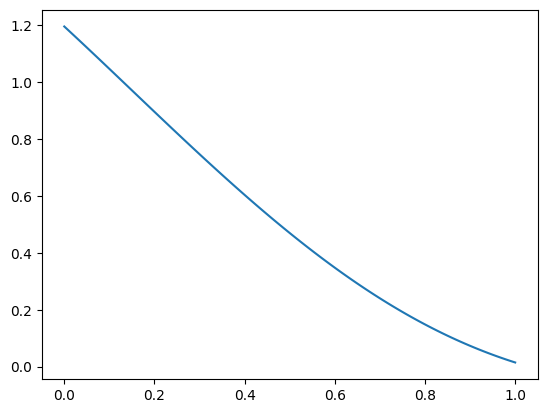

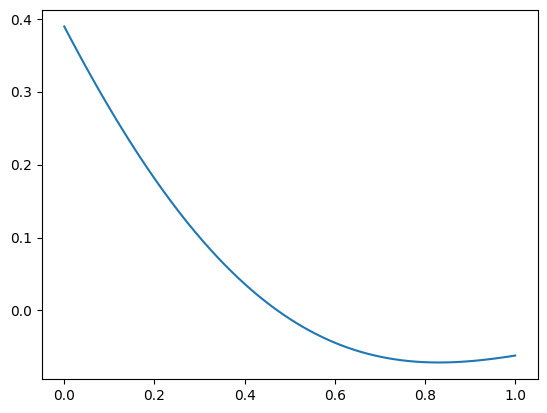

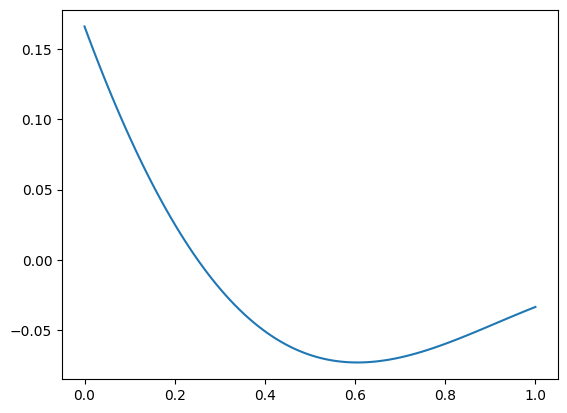

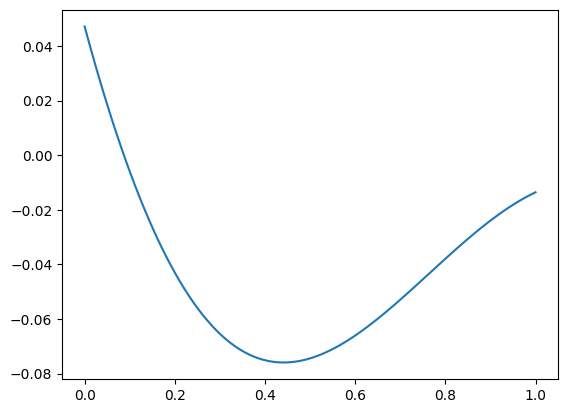

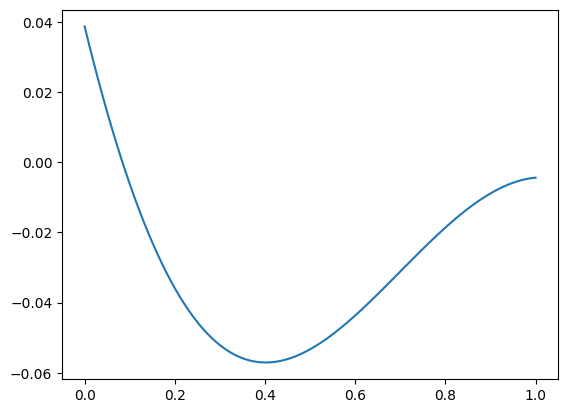

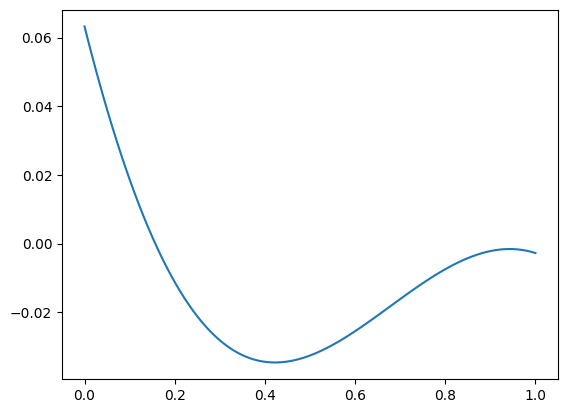

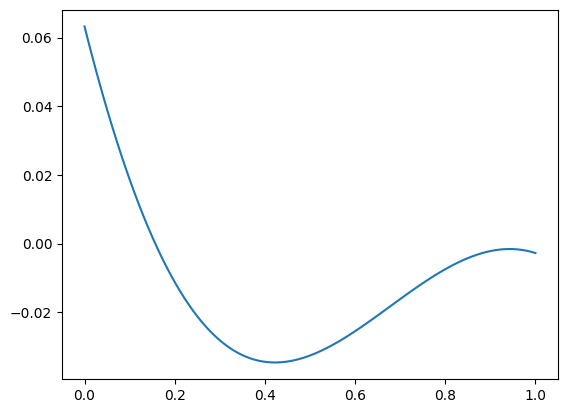

In [6]:
trainer = Trainer(model, optimizer, config, loss_fn)
trainer.fit(train_dataloader=data)

# Fitting a function with a QNN using ml_tools

/home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/torch/nn/modules/module.py:1145: UserWarning: Complex modules are a new feature under active development whose design may change, and some modules might not work as expected when using complex tensors as parameters or buffers. Please file an issue at https://github.com/pytorch/pytorch/issues/new?template=bug-report.yml if a complex module does not work as expected.
  warnings.warn(


2025-02-15 14:55:16 INFO     Writing QNN checkpoint model_QNN_ckpt_best_device_cpu.pt               ]8;id=340544;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=180222;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#106\106]8;;\

                    INFO     Writing Adam to checkpoint opt_Adam_ckpt_best_device_cpu.pt            ]8;id=872442;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=723108;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#116\116]8;;\

2025-02-15 14:55:17 INFO     Writing QNN checkpoint model_QNN_ckpt_best_device_cpu.pt               ]8;id=987324;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=674565;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#106\106]8;;\

                    INFO     Writing Adam to checkpoint opt_Adam_ckpt_best_device_cpu.pt            ]8;id=334217;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=730132;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#116\116]8;;\

2025-02-15 14:55:18 INFO     Writing QNN checkpoint model_QNN_ckpt_best_device_cpu.pt               ]8;id=852227;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=78629;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#106\106]8;;\

                    INFO     Writing Adam to checkpoint opt_Adam_ckpt_best_device_cpu.pt            ]8;id=677366;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=464971;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#116\116]8;;\

2025-02-15 14:55:19 INFO     Writing QNN checkpoint model_QNN_ckpt_best_device_cpu.pt               ]8;id=136384;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=168746;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#106\106]8;;\

                    INFO     Writing Adam to checkpoint opt_Adam_ckpt_best_device_cpu.pt            ]8;id=346620;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=488983;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#116\116]8;;\

2025-02-15 14:55:20 INFO     Writing QNN checkpoint model_QNN_ckpt_best_device_cpu.pt               ]8;id=796456;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=655498;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#106\106]8;;\

                    INFO     Writing Adam to checkpoint opt_Adam_ckpt_best_device_cpu.pt            ]8;id=161395;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=735395;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#116\116]8;;\

2025-02-15 14:55:21 INFO     Writing QNN checkpoint model_QNN_ckpt_best_device_cpu.pt               ]8;id=859907;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=471907;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#106\106]8;;\

                    INFO     Writing Adam to checkpoint opt_Adam_ckpt_best_device_cpu.pt            ]8;id=445405;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=633941;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#116\116]8;;\

2025-02-15 14:55:22 INFO     Writing QNN checkpoint model_QNN_ckpt_best_device_cpu.pt               ]8;id=115674;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=544973;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#106\106]8;;\

                    INFO     Writing Adam to checkpoint opt_Adam_ckpt_best_device_cpu.pt            ]8;id=738963;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=302274;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#116\116]8;;\

2025-02-15 14:55:23 INFO     Writing QNN checkpoint model_QNN_ckpt_best_device_cpu.pt               ]8;id=570871;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=654688;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#106\106]8;;\

                    INFO     Writing Adam to checkpoint opt_Adam_ckpt_best_device_cpu.pt            ]8;id=731351;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=362021;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#116\116]8;;\

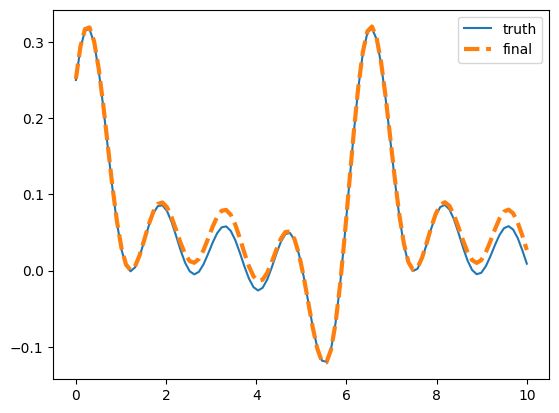

In [7]:
from pathlib import Path
import torch
from functools import reduce
from operator import add
from itertools import count
import matplotlib.pyplot as plt

from qadence import Parameter, QuantumCircuit, Z
from qadence import hamiltonian_factory, hea, feature_map, chain
from qadence import QNN
from qadence.ml_tools import  TrainConfig, Trainer, to_dataloader

Trainer.set_use_grad(True)

DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
DTYPE = torch.complex64
n_qubits = 4
fm = feature_map(n_qubits)
ansatz = hea(n_qubits=n_qubits, depth=3)
observable = hamiltonian_factory(n_qubits, detuning=Z)
circuit = QuantumCircuit(n_qubits, fm, ansatz)

model = QNN(circuit, observable, backend="pyqtorch", diff_mode="ad")
batch_size = 100
input_values = {"phi": torch.rand(batch_size, requires_grad=True)}
pred = model(input_values)

cnt = count()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

def loss_fn(model: torch.nn.Module, data: torch.Tensor) -> tuple[torch.Tensor, dict]:
    next(cnt)
    x, y = data[0], data[1]
    out = model(x)
    loss = criterion(out, y)
    return loss, {}

def validation_criterion(
    current_validation_loss: float, current_best_validation_loss: float, val_epsilon: float
) -> bool:
    return current_validation_loss <= current_best_validation_loss - val_epsilon

n_epochs = 300

config = TrainConfig(
    max_iter=n_epochs,
    batch_size=batch_size,
    checkpoint_best_only=True,
    val_every=10,  # The model will be run on the validation data after every `val_every` epochs.
    validation_criterion=validation_criterion
)

fn = lambda x, degree: .05 * reduce(add, (torch.cos(i*x) + torch.sin(i*x) for i in range(degree)), 0.)
x = torch.linspace(0, 10, batch_size, dtype=torch.float32).reshape(-1, 1)
y = fn(x, 5)

train_dataloader = to_dataloader(x, y, batch_size=batch_size, infinite=True)
val_dataloader =  to_dataloader(x, y, batch_size=batch_size, infinite=True)

trainer = Trainer(model, optimizer, config, loss_fn=loss_fn,
                    train_dataloader = train_dataloader, val_dataloader = val_dataloader,
                    device=DEVICE, dtype=DTYPE)
trainer.fit()

plt.clf()
plt.plot(x.numpy(), y.numpy(), label='truth')
plt.plot(x.numpy(), model(x).detach().numpy(), "--", label="final", linewidth=3)
plt.legend()

# Fitting a function - Low-level API

In [1]:
from tqdm.notebook import tqdm
from pathlib import Path
import torch
from itertools import count
from qadence.constructors import hamiltonian_factory, hea, feature_map
from qadence import chain, Parameter, QuantumCircuit, Z
from qadence import QNN
from qadence.ml_tools import TrainConfig

n_qubits = 2
fm = feature_map(n_qubits)
ansatz = hea(n_qubits=n_qubits, depth=3)
observable = hamiltonian_factory(n_qubits, detuning=Z)
circuit = QuantumCircuit(n_qubits, fm, ansatz)

model = QNN(circuit, observable, backend="pyqtorch", diff_mode="ad")
batch_size = 1
input_values = {"phi": torch.rand(batch_size, requires_grad=True)}
pred = model(input_values)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
n_epochs=50
cnt = count()

tmp_path = Path("/tmp")

config = TrainConfig(
    root_folder=tmp_path,
    max_iter=n_epochs,
    checkpoint_every=100,
    write_every=100,
    batch_size=batch_size,
)

x = torch.linspace(0, 1, batch_size).reshape(-1, 1)
y = torch.sin(x)

for i in tqdm(range(n_epochs)):
    out = model(x)
    loss = criterion(out, y)
    loss.backward()
    optimizer.step()

  0%|          | 0/50 [00:00<?, ?it/s]

# Performing pre-training Exploratory Landscape Analysis (ELA) with Information Content (IC)

In [2]:
import torch
from torch.optim.adam import Adam

from qadence.constructors import ObservableConfig
from qadence.ml_tools.config import AnsatzConfig, FeatureMapConfig, TrainConfig
from qadence.ml_tools.data import to_dataloader
from qadence.ml_tools.models import QNN
from qadence.ml_tools.optimize_step import optimize_step
from qadence.ml_tools.trainer import Trainer
from qadence.operations.primitive import Z

fm_config = FeatureMapConfig(num_features=1)
ansatz_config = AnsatzConfig(depth=4)
obs_config = ObservableConfig(detuning=Z)

qnn = QNN.from_configs(
    register=4,
    obs_config=obs_config,
    fm_config=fm_config,
    ansatz_config=ansatz_config,
)

optimizer = Adam(qnn.parameters(), lr=0.001)

batch_size = 25
x = torch.linspace(0, 1, 32).reshape(-1, 1)
y = torch.sin(x)
train_loader = to_dataloader(x, y, batch_size=batch_size, infinite=True)

train_config = TrainConfig(max_iter=100)

trainer = Trainer(
    model=qnn,
    optimizer=optimizer,
    config=train_config,
    loss_fn="mse",
    train_dataloader=train_loader,
    optimize_step=optimize_step,
)

# Perform exploratory landscape analysis with Information Content
ic_sensitivity_threshold = 1e-4
epsilons = torch.logspace(-2, 2, 10)

max_ic_lower_bound, max_ic_upper_bound, sensitivity_ic_upper_bound = (
    trainer.get_ic_grad_bounds(
        eta=ic_sensitivity_threshold,
        epsilons=epsilons,
    )
)

print(
    f"Using maximum IC, the gradients are bound between {max_ic_lower_bound:.3f} and {max_ic_upper_bound:.3f}\n"
)
print(
    f"Using sensitivity IC, the gradients are bounded above by {sensitivity_ic_upper_bound:.3f}"
)

# Resume training as usual...

trainer.fit(train_loader)

Output()

Using maximum IC, the gradients are bound between 0.068 and 0.377

Using sensitivity IC, the gradients are bounded above by 0.421


/home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/networkx/readwrite/json_graph/node_link.py:142: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(


2025-02-15 14:57:53 INFO     Writing QNN checkpoint model_QNN_ckpt_100_device_cpu.pt                ]8;id=780751;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=480260;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#106\106]8;;\

                    INFO     Writing Adam to checkpoint opt_Adam_ckpt_100_device_cpu.pt             ]8;id=758389;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py\saveload.py]8;;\:]8;id=58520;file:///home/petark/PycharmProjects/venvs/pasqal/lib/python3.12/site-packages/qadence/ml_tools/callbacks/saveload.py#116\116]8;;\

(QNN(
   (_circuit): ConvertedCircuit(
     (native): QuantumCircuit(
       (operations): ModuleList(
         (0): Sequence(
           (operations): ModuleList(
             (0): Sequence(
               (operations): ModuleList(
                 (0): Sequence(
                   (operations): ModuleList(
                     (0): Sequence(
                       (operations): ModuleList(
                         (0): RX(target: (0,), param: x)
                         (1): RX(target: (1,), param: x)
                         (2): RX(target: (2,), param: x)
                         (3): RX(target: (3,), param: x)
                       )
                     )
                   )
                 )
               )
             )
             (1): Sequence(
               (operations): ModuleList(
                 (0): Sequence(
                   (operations): ModuleList(
                     (0): Merge(
                       (operations): ModuleList(
                         (0):